# Banco de pruebas para algoritmos de prescripción auditiva en Jupyter Notebook.

## Test bench for auditory prescription algorithms in Jupyter Notebook.

Nicolás Quezada Baier<sup>1a*</sup>, Geovana Casanova Torres<sup>2a*</sup>, Claudia Lara Solís <sup>3a*</sup>, Javiera Miranda Molina<sup>3</sup>

<sup>a</sup>Tecnólogo Médico, <sup>1</sup>Investigador Principal, <sup>2</sup> Coinvestigadora, <sup>3</sup>Alumna Tecnología Médica.

<sup>*</sup>Escuela de Tecnología Médica, Universidad Austral de Chile, Sede Puerto Montt, Chile.



## Resumen

<h3>Introducción:</h3>El DPS (digital processing signal) es un conjunto de circuitos capaces de tratar una señal acústica mediante fórmulas algorítmicas, entre las cuales están los métodos prescriptivos y sistemas de compresión. Para trabajar con nuevos algoritmos es necesario contar con una plataforma en donde se pueda observar su funcionamiento, una alternativa es desarrollar un banco de pruebas con los algoritmos en Jupyter Notebook. El objetivo de esta investigación es recabar los diferentes algoritmos y sus fórmulas y/o métodos para construir un banco de pruebas en Jupyter Notebook.

<h3>Método:</h3> La investigación se dividió en 2 etapas. La primera etapa correspondió a la búsqueda bibliográfica de los métodos prescriptivos y sistemas de compresión junto con sus fórmulas. En la segunda etapa se crearon algoritmos funcionales que se escribieron en Python, en la plataforma Jupyter Notebook.

<h3>Resultados:</h3> Los algoritmos encontrados con sus fórmulas fueron: WDRC, FIG6, POGO II, NAL-R, NAL-RP y DSL, los cuales se implementaron en un banco de pruebas y de verificación en la plataforma Jupyter Notebook, software disponible en: https://jovian.ai/debaq/banco-de-pruebas-para-algoritmos-de-prescripcion-auditiva.

<h3>Conclusión:</h3> Es posible crear una plataforma en donde se encuentren las fórmulas algorítmicas de los métodos prescriptivos y sistemas de compresión.

<h3>Palabras Claves:</h3> Algoritmo; WDRC; métodos prescriptivos; sistemas de compresión; Jupyter Notebook.

Este proyecto ha sido desarrollado en Jupiter-notebook (v6.4.0) con python (v3.9.5)


=========================
# INDICE
 
* [Introducción](#Chapter1)<br>
* [Importaciones](#Chapter2)<br>
* [Sistemas de compresion](#sistemacompresion)<br>
    * [WDRC](#WDRC)<br>

* [Prescriptivos](#prescriptivos) <br>
    * [Módelos no lineales](#noLineales)
        * [FIG6](#FIG6)
            * [FIG6 ganancia](#FIG6_ganancia)
        * [DSL I/O](#DSLIO)
        * [NAL-NL1 y NAL-NL2](#NALNL) <br>

    * [Lineales](#lineales)
        * [NAL-R](#nalr)
        * [NAL-RP](#nalrp)
            * [NAL-RP ejemplos](#nalrp_example)
        * [POGO II](#pogoII)
            * [POGO II ejemplos](#pogo_II_example)
        * [DSL 4.0](#DSL)
            * [DSL 4.0 ejemplos](#DSL4_ejemplo)
        * [Comparación NAL-RP/POGO II/DSL](#NAL_POGO_DSL)
* [Bibliografía](#Bibliografía) <br>






# Introducción <span id="Chapter1"><span>

Durante los últimos 50 años, la tecnología de las adaptaciones auditivas ha evolucionado pasando de sistemas análogos de amplificación lineal con posibilidades de algunos pequeños ajustes, a sistemas totalmente digitales con preajustes adaptados a las necesidades individuales de cada patología y características sociales del individuo [1].
    
El cambio más radical a nivel evolutivo de los protéticos auditivos ha sido la incorporación de algoritmos matemáticos que permiten el ajuste fino y en vivo de las señales acústicas, permitiendo mejorar el habla; reducir el feedback (acoplamiento sonoro), el ruido ambiente y el eco de la voz del individuo; realizar compresión frecuencial; y clasificar el ambiente auditivo, entre otras capacidades [2]. Para lograr estos propósitos, los audífonos han debido incorporar procesadores computacionales especializados en señales sonoras. Estos microchips son conocidos como DPS (digital processing signal) [3], los cuales son un conjunto de circuitos integrados capaces de tratar una señal acústica mediante fórmulas algorítmicas. Un esquema simplificado de este proceso se observa en la figura 1, en donde la señal de entrada es recepcionada por el micrófono (a la izquierda), la cual pasa a un conversor análogo digital dentro o fuera del micrófono; dicha señal se traslada al DPS para ser procesada, luego a un conversor digital a análogo para ser transmitida al altavoz.

Dentro de estos algoritmos digitales aquellos que tratan la señal auditiva para ajustarla a la condición auditiva del paciente son conocidos como métodos prescriptivos. Estos se definen según Cornelisse como “una función que prescribe la ganancia del audífono de forma específica en frecuencia”. La ganancia comprende la modificación en amplitud tanto positiva (expansión) como negativa (compresión), que se sumará o se restará de la señal de entrada para así adaptarla a la pérdida auditiva del individuo y esta sea escuchada como una sensación acústica similar a la normal [6]. Según Zenker los métodos prescriptivos se pueden dividir en función del tipo de aparato para el cual han sido diseñados. Actualmente se pueden diferenciar entre los audífonos lineales y no lineales, en donde los no lineales van a necesitar parámetros como el ratio (proporción entre la entrada y la salida) y el umbral de compresión para funcionar de forma dinámica, en cambio los lineales se determinan en base a un solo valor de referencia como el umbral de pérdida auditiva [5]. 
    
Dentro de los métodos prescriptivos, existen aquellos que han sido formulados por centros de investigación públicos como el NAL-R (National Acoustic Laboratories Revised), NAL-RP (National Acoustic Laboratories Revised-Profound), NAL-NL1 (National Acoustic Laboratories - Non Linear 1) y NAL-NL2 (National Acoustic Laboratories - Non Linear 2), todos estos métodos publicados por el National Acoustic Laboratories (NAL), la cual es una división de investigación del Australian Hearing formada en 1947, con el objetivo de ayudar a las personas con problemas auditivos [7]. Otro ejemplo es el DSL (Desired Sensation Level) formulado en 1976 por Seewald y Ross en la Universidad de Connecticut, que posteriormente ha tenido diferentes modificaciones desde la versión 1 a la versión 5, todas ellas publicadas en revistas de acceso abierto [8]. Por otro lado, existen los métodos prescriptivos diseñados por las empresas manufactureras de aparatos prostéticos que son de códigos privado, donde solo es posible encontrar resultados de las adaptaciones, pero rara vez sobre las mecánicas de funcionamiento de estos algoritmos. 
    
Otros sistemas de procesamiento digital de la señal son los sistemas de compresión, los cuales modifican las amplitudes de los sonidos de entrada para ajustarla al rango dinámico de audición (espacio existente entre la mínima audición y el nivel de máxima molestia del individuo). Dentro de estos sistemas se encuentra el Wide Dynamic Range Compression (WDRC), el cual ya se utilizaba en sistemas análogos y se mantiene hoy en día en sistemas digitales, tiene como propósito amplificar sonidos suaves y comprimir los fuertes que son incómodos [10]. En este sistema la ganancia se aplica si el nivel de entrada es menor que el umbral de compresión; de lo contrario, se aplica compresión [9]. Este sistema puede ser utilizado en conjunto con métodos prescriptivos, por ejemplo, el FIG6 para pérdidas neurosensoriales que necesiten menos ganancia para sonidos intensos que para los suaves [2].
    
Para mejorar, tratar o crear nuevos métodos prescriptivos es necesario contar con algoritmos ejecutables en donde se pueda observar su funcionamiento. Por ejemplo; estudiar el comportamiento de las fórmulas respecto a una patología determinada o poder comparar diferentes métodos para evaluar cuál tiene la mejor ganancia en las frecuencias del habla o poder modificar las fórmulas y/o las constantes de ganancia de los distintos métodos, para así generar mejores y nuevos ajustes no considerados en las versiones anteriores. Para todo lo anterior es necesario contar un software que realice estas acciones, una alternativa es desarrollar un banco de pruebas con los algoritmos.
    
Dentro del mundo del Data Science, una de las herramientas más difundidas para el análisis de datos, creación de fórmulas y compartición de códigos es Jupyter Notebook [11], una aplicación web de código abierto que corre en cualquier navegador de internet moderno. En esta aplicación es posible escribir códigos de programación en diferentes lenguajes, principalmente R y Python, permitiendo documentar el código de forma narrativa, además de entregar interactividad para modificar su contenido [11], lo cual la hace una herramienta ideal para crear bancos de pruebas.
    
El objetivo de esta investigación es recabar los diferentes algoritmos y sus fórmulas y/o métodos para construir un banco de pruebas en Jupyter Notebook que permita estudiar sus características y modificar sus propiedades.
    

Cada item incluye:
* Comentario inicial del procedimiento
* Comentarios del código
* Prueba de funcionamiento y explicación

## MATERIALES Y MÉTODOS 
Creación del banco de pruebas
	Se desarrollaron algoritmos funcionales DPS, que se escribieron en lenguaje Python (v3.9.5), para esto se utilizó la plataforma Jupyter Notebook (v6.4.0). Además, se utilizaron módulos entre los que se encuentran: Librosa (v0.8.1) para el análisis de audio y música, Numpy (v1.20.2) para la creación y manejo de vectores y matrices, Matplotlib (v3.3.4) para graficar datos y por último Scipy (v1.6.2) para abrir y guardar archivos de audio y. filtrado de frecuencias. El notebook fue compartido de manera pública mediante la plataforma Jovian y GitHub. 
Finalmente, teniendo todas las fórmulas montadas en el banco de pruebas se procedió a ejecutar demostraciones de la funcionalidad del notebook, para esto se probó cada una de las fórmulas según su ganancia. Además, para ejecutar las pruebas se utilizaron pérdidas auditivas simuladas, las cuales fueron: una pérdida plana con promedio tonal puro de las frecuencias de 0.5,1,2,4 kHz de 55 dB y una pérdida auditiva descendente con promedio tonal puro de las frecuencias de 0.5,1,2,4 kHz de 77,5 dB, y un UCL (Umbral de molestia) de 95 dB para las frecuencias de 0.5,1 kHz y 100 dB para 2 kHz, como se aprecia en la [figura 2](#fig2).

![fig2](https://raw.githubusercontent.com/Debaq/jupyter_algorithms_hear_aid/main/Fig/fig1.jpg)

# Importaciones <span id="Chapter2"><span>
    
Importamos las librerias necesarias, en este trabajo se privilegia la utilización directa de numpy, pueden existir otras librerias pero con el tiempo se iran quitando para implementar el uso de numpy.

## Librosa:
Version: 0.8.1

web : https://librosa.org/

Librosa es una implementación para el analisis de audio y música.

> McFee, Brian, Colin Raffel, Dawen Liang, Daniel PW Ellis, Matt McVicar, Eric Battenberg, and Oriol Nieto. “librosa: Audio and music signal analysis in python.” In Proceedings of the 14th python in science conference, pp. 18-25. 2015.


## Matplotlib
Version: 3.3.4

web:https://matplotlib.org/

Matplotlib es una libreria para realizar grafico de datos.

>John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55 



## Numpy
Version: 1.20.2

web: https://numpy.org/

Numpy es una libreria que permite la creación y manejo de vectores y matrices.

> Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2. (Publisher link).


## SciPy
Version: 1.6.2

web: https://www.scipy.org/

Libreria con un gran conjunto de algoritmos mátematicos y de manejo de señales

> Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272.



In [ ]:
##Intalar las librerias
!pip install librosa --upgrade -q
!pip install Matplotlib --upgrade -q
!pip install numpy --upgrade -q
!pip install scipy --upgrade -q
#!pip install mpld3 --upgrade -q



In [2]:
#### Librerias de visualización, no son fundamentales en la implementación en embedidos ####

import librosa
#imprtamos módulo que permite crear espectogramas
from librosa.display import specshow 

#Magia!
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
#importamos pyplot de matplotlib como plt para un uso más intuitivo

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#### Librerias de procesamiento de señal ####

#importamos numpy como np un uso más intuitivo
import numpy as np 

#Importamos scipy.wavfile para abrir archivos wav
import scipy.io.wavfile as wav 
#Importamos scipy.wavfile para guardar archivos wav
from scipy.io.wavfile import write 
#Importamos butter y lfilter para crear los filtros necesarios
from scipy.signal import butter, lfilter


### Otras librerias que solo ayudan a la operativa ###
import pathlib


#colores
cl_1 = '#896983'
cl_2 = '#171716'
cl_3 = '#5c5b58'
cl_4 = '#171716'
cl_5 = '#454442'
cl_6 = '#73726e'


In [ ]:
## JOVIAN API que permite subir el archivo a la red a https://jovian.ai
!pip install jovian --upgrade -q

In [21]:
import jovian
#Se actualiza el notebook en Jovian
jovian.commit(filename='Notebook.ipynb', project='Banco de pruebas para algoritmos de prescripción auditiva')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "debaq/banco-de-pruebas-para-algoritmos-de-prescripcion-auditiva" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/debaq/banco-de-pruebas-para-algoritmos-de-prescripcion-auditiva


'https://jovian.ai/debaq/banco-de-pruebas-para-algoritmos-de-prescripcion-auditiva'

# Sistemas de Compresión <span id="sistemacompresion"><span>
    



## WDRC <span id="WDRC"><span>
    
Este mecanismo funciona captando los cambios del nivel de la señal por un detector de “peaks” que activa un mecanismo de “time attack”, el cual corresponde a una compuerta de accionamiento del sistema de compresión. El detector de peaks se activa solo con las intensidades medias y altas comprimiendolas en un ratio de 1.5:1 hasta 3:1, si las intensidades superan el UCL (umbral de molestia) se activa un sistema de limitación que comprime en
relación 10:1. Todos los sonidos suaves pueden ser amplificados de forma lineal (sumándole una cantidad de dB a todas las entradas) mientras que los muy suaves que estén bajo el nivel auditivo pueden ser expandidos en relación 1:2. Finalmente se analiza la salida esperando, que disminuyan los peaks, lo cual activa un sistema “release attack” el cual detendrá las compresiones. Los sistemas “time attack “y “release attack” sirven para evitar sonidos estridentes al amplificar o comprimir demasiado rápido los sonidos de entrada.
    
    
![fig2](https://raw.githubusercontent.com/Debaq/jupyter_algorithms_hear_aid/main/Fig/wdrc.png)
    

In [3]:
def attack_time():
    pass
def release_time():
    pass


def wdrc(pdb, exp_cr=0.57, exp_end_knee=30, tkgn=20,  tk=50,  cr=1.5, bolt=90, limit=8.0):
    """WDRC

    Args:
        pdb (list): Lista de valores para evaluar
        exp_cr (float, optional): factor de expansión. Defaults to 0.57.
        exp_end_knee (int, optional): rodilla de la expansión. Defaults to 30.
        tkgn (int, optional): Ganancia Lineal. Defaults to 20.
        tk (int, optional): Rodilla de la compresión. Defaults to 50.
        cr (float, optional): factor de compresión. Defaults to 1.5.
        bolt (int, optional): comienzo de la limitación. Defaults to 90.
        limit (float, optional): factor del limitador. Defaults to 8.0.

    Returns:
        list: [valores en db con el ajuste de ganancia, tipo de acción(expansión, compresión, limitación)]
    """
        
    gdb = 0.0
    tkgo= 0.0
    pblt= 0.0
    k= 0.0
    tk_tmp = tk 
    if ((tk_tmp + tkgn) > bolt): 
        tk_tmp = bolt - tkgn 

    tkgo = tkgn + tk_tmp * (1.0 - 1.0 / cr)  #intermediate calc
    pblt = cr * (bolt - tkgo) 
    cr_const = ((1.0 / cr) - 1.0) 

    #
    gain_at_exp_end_knee = tkgn
    if (tk_tmp < exp_end_knee):
        gain_at_exp_end_knee  = cr_const * exp_end_knee + tkgo
    
    # se calculan las ganancias
    exp_cr_const = 1.0/max(0.01,exp_cr) - 1.0
    regime = 0
    if (pdb < exp_end_knee): #if below the expansion threshold, do expansion expansion region.
        gdb = gain_at_exp_end_knee - ((exp_end_knee-pdb)*exp_cr_const) #reduce gain the farther down you are from the end of the expansion region
        regime = 0
    elif ((pdb < tk_tmp) and (cr >= 1.0)): #si el input esta bajo el nivel de compresión se realiza ganancia lineal
        gdb = tkgn  
        regime = 1
    elif (pdb > pblt): #se verifica que la intensidad ingresada este sobre el nivel de limite
        gdb =  bolt + ( (pdb - pblt) / limit) - pdb #10:1 se limita, esto puede ir desde 8:10 hasta el infito
        regime = 3
    else:
        gdb = cr_const * pdb + tkgo #Compresión
        regime = 2
    

    output_dB = pdb + gdb
    output = [output_dB, regime]
    return output



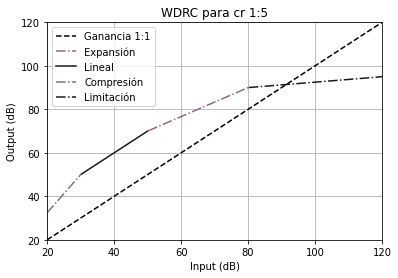

In [4]:
input_db = np.arange(20,121,0.2)

expand = []
linear = []
compress = []
limit = []

for i in input_db:
    data = wdrc(i)

    if data[1] == 0:
        expand.append(data[0])
    if data[1] == 1:
        linear.append(data[0])
    if data[1] == 2:
        compress.append(data[0])
    if data[1] == 3:
        limit.append(data[0])

    

fig, ax = plt.subplots()
ax.plot(input_db, input_db, linestyle="--", label="Ganancia 1:1", color='k')
ax.plot(input_db[0:len(expand)], expand, linestyle="dashdot", label="Expansión", color=cl_1)
ax.plot(input_db[len(expand):len(linear)+len(expand)],linear, label="Lineal", color = cl_2)
ax.plot(input_db[len(linear)+len(expand):len(linear)+len(expand)+len(compress)],compress,  linestyle="dashdot", label="Compresión", color = cl_1)
ax.plot(input_db[len(linear)+len(expand)+len(compress):],limit,  label="Limitación", linestyle="dashdot", color = cl_2)
plt.xlim([20, 120])
plt.ylim([20, 120])
ax.set(xlabel='Input (dB)', ylabel='Output (dB)',
       title='WDRC para cr 1:5')
leg = ax.legend()
plt.grid(True)
fig.savefig("ejemplos de WDRC.jpg")

plt.show()


Para evaluar este algoritmo en el banco de pruebas se ingresó un dataset que representaba los decibeles de entrada ordenados de uno en uno del 20 a 120 dB. Obsérvese en la figura 4 como al ingresar 20 dB este es expandido de forma no lineal (tómese como referencia la línea segmentada que va desde la esquina inferior izquierda a la esquina superior derecha), posterior a esto se puede observar una amplificación lineal desde los 30 dB a 40 dB de entrada. A continuación, se observa una línea punteada la que corresponde a la compresión en relación 1:5, al llegar a la entrada de 80 dB se activa el sistema de limitación el cual aumenta la compresión para generar intensidades de salida menores al umbral de molestia.

## Compresión Lineal <span id="compresionLineal"><span>

In [5]:
#Sin implemenatación

# Presentación de modelos prescriptivos <span id="prescriptivos"><span>
    
    
Los métodos prescriptivos se pueden dividir en función del tipo de aparato para el cual han sido diseñados. Actualmente se pueden diferenciar entre los audífonos lineales y no lineales, en donde los no lineales van a necesitar parámetros como el ratio y el umbral de compresión para funcionar de forma dinámica, en cambio los lineales se determinan en base a un solo valor de referencia como el umbral de pérdida auditiva.

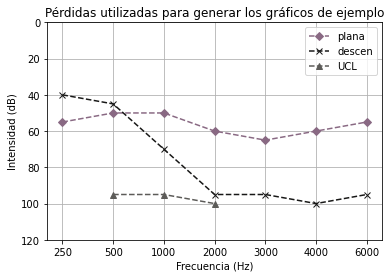

In [6]:
# Data for plotting

HTL_plana={"250":55,"500":50,"1000":50,"2000":60,"3000":65,"4000":60,
           "6000":55}

HTL_descendente ={"250":40,"500":45,"1000":70,"2000":95,"3000":95,"4000":100,
           "6000":95}

UCL = {"500":95, "1000":95, "2000":100}


curve_plane = HTL_plana.items()
x1, y1 = zip(*curve_plane)


curve_desc = HTL_descendente.items()
x2, y2 = zip(*curve_desc)

curve_UCL = UCL.items()
x3, y3 = zip(*curve_UCL)

fig, ax = plt.subplots()

ax.plot(x1,y1, linestyle='--', marker='D', color=cl_1, label='plana')
ax.plot(x2,y2, linestyle='--', marker='x', color=cl_2, label='descen')
ax.plot(x3,y3, linestyle='--', marker='^', color=cl_3, label='UCL')

leg = ax.legend();
plt.ylim([0, 120])
plt.gca().invert_yaxis()


ax.set(xlabel='Frecuencia (Hz)', ylabel='Intensidad (dB)',
       title='Pérdidas utilizadas para generar los gráficos de ejemplo')
ax.grid()

fig.savefig("Fig/fig1.jpg")
plt.show()


## Módelos no lineales: <span id="noLineales"><span>
    


## FIG6 <span id="fig6"><span>
    
Funciona tomando una señal sonora de entrada evaluando el umbral auditivo para cada una de las frecuencias. En base a esto y dependiendo si la frecuencia tiene una intensidad menor a 40 dB o entre 40 dB a 95 dB o mayor a 95 dB, luego esta se subdivide si es menor a 20 dB, entre 20 dB a 60 dB, mayor a 60 dB y mayor o menor a 40 dB dependiendo de la intensidad de entrada para aplicar las respectivas fórmulas que tendrán como resultado una
ganancia específica (IG).
    
    
![fig2](https://raw.githubusercontent.com/Debaq/jupyter_algorithms_hear_aid/main/Fig/FIG6_dia.png)    


In [7]:

def FIG6(i, HTL):
    """FIG6

    Args:
        i (float): intensidad de entrada
        HTL (int): Umbral auditivo

    Returns:
        [int]: Ganancia de inserción
    """
    i_a = i
    HTL = int(HTL)
    if i_a < 45: # dBSPL
        if HTL <= 20:
            IG= 0
        if HTL > 20 and HTL < 60:
            IG= HTL - 20
        if HTL >= 60:
            p1 = HTL - 20
            p2 = HTL - 60
            p3 = 0.5 * p2
            IG= p1 - p3
  

    if i_a >= 45 and i < 95:
        if HTL <= 20:
            IG= 0
        if HTL > 20 and HTL < 60:
            IG= 0.6 * (HTL-20)
        if HTL >= 60:
            IG= 0.8 * HTL - 23
            
            
    if i_a >= 95:
        if HTL >= 40:
            IG= 0.1 * (HTL-40)**1.4
        else:
            IG= 0
            
    
    return IG



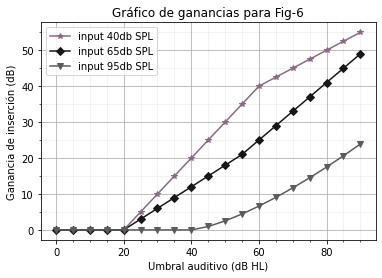

In [8]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
list_htl = np.arange(0,95,5)

gain_40_fig6=[[],[]]
gain_65_fig6=[]
gain_95_fig6=[]

for i in list_htl:
    gain_r = FIG6(40, i)
    gain_40_fig6[0].append(gain_r)
    gain_40_fig6[1].append(i)
    gain_r = FIG6(65, i)
    gain_65_fig6.append(gain_r)
    gain_r = FIG6(95, i)
    gain_95_fig6.append(gain_r)



fig, ax = plt.subplots()
ax.plot(gain_40_fig6[1], gain_40_fig6[0], label="input 40db SPL", color= cl_1, marker = '*')
ax.plot(gain_40_fig6[1], gain_65_fig6, label="input 65db SPL", color=cl_2, marker = 'D')
ax.plot(gain_40_fig6[1], gain_95_fig6, label="input 95db SPL", color=cl_3, marker = 'v')
leg = ax.legend();
ax.set(xlabel='Umbral auditivo (dB HL)', ylabel='Ganancia de inserción (dB)',
       title='Gráfico de ganancias para Fig-6')
ax.grid(True)
ax.grid(which='minor', alpha=0.2)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
fig.savefig("Fig/ejemplos de perdida - Fig6.jpg")



Descripción imagen: Para evaluar este algoritmo en el banco de pruebas se utilizaron las dos
pérdidas simuladas, en las cuales se ve como la ganancia aumenta en función de la pérdida
auditiva a distintos niveles de entrada. En base a esto se observa como en las frecuencias
graves (250 Hz y 500 Hz) no aumenta la ganancia de manera considerable como si lo hace
desde las frecuencias del habla (1000 Hz y 2000 Hz) hasta las frecuencias agudas (3000 Hz a
6000 Hz), esto ocurre para todas las intensidades de entradas presentadas en el gráfico 6.

## FIG6 - Ganancia <span id="FIG6_ganancia"><span>
    
Ejemplo gráfico del funcionamiento del algoritmo.

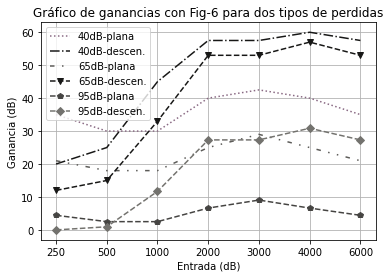

In [9]:
HTL_p = HTL_plana
HTL_d = HTL_descendente

gain_40 = [[],[]]
gain_65 = [[],[]]
gain_90 = [[],[]]

f = []

for i in HTL_p:
    gain_r = FIG6(40, HTL_p[i])
    gain_40[0].append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r = FIG6(40,HTL_d[i])
    gain_40[1].append(gain_r)
    
for i in HTL_p:
    gain_r = FIG6(65, HTL_p[i])
    gain_65[0].append(gain_r)

for i in HTL_d:
    gain_r = FIG6(65,HTL_d[i])
    gain_65[1].append(gain_r)

for i in HTL_p:
    gain_r = FIG6(95, HTL_p[i])
    gain_90[0].append(gain_r)

for i in HTL_d:
    gain_r = FIG6(95,HTL_d[i])
    gain_90[1].append(gain_r)

fig, ax = plt.subplots()



ax.plot(f,gain_40[0], linestyle='dotted', color=cl_1, label='40dB-plana')
ax.plot(f,gain_40[1], linestyle='dashdot', color=cl_2, label='40dB-descen.')
ax.plot(f,gain_65[0], linestyle=(0, (3, 5, 1, 5, 1, 5)), color=cl_3, label='65dB-plana')
ax.plot(f,gain_65[1], linestyle='--', color=cl_4, label='65dB-descen.', marker = 'v')
ax.plot(f,gain_90[0], linestyle='--', color=cl_5, label='95dB-plana', marker = 'p')
ax.plot(f,gain_90[1], linestyle='--', color=cl_6, label='95dB-descen.', marker = 'D')

leg = ax.legend();

ax.set(xlabel='Entrada (dB)', ylabel='Ganancia (dB)',
       title='Gráfico de ganancias con Fig-6 para dos tipos de perdidas')
ax.grid()

fig.savefig("gain_fig6.jpg")
plt.show()

## DSL I/O <span id="DSLIO"><span>
## SIN IMPLEMENTACIÓN
    
> Seewald, R., Moodie, S., Scollie, S., & Bagatto, M. (2005). The DSL method for pediatric hearing instrument fitting: historical perspective and current issues. Trends in amplification, 9(4), 145–157. https://doi.org/10.1177/108471380500900402

> S S, Vignesh. (2014). Adaptive Expert System for Digital Hearing Aids Gain recommendations using Linear and Non Linear Prescriptive Procedures. WSEAS Transactions on Biology and Biomedicine. 11. https://www.researchgate.net/publication/275582747_Adaptive_Expert_System_for_Digital_Hearing_Aids_Gain_recommendations_using_Linear_and_Non_Linear_Prescriptive_Procedures


In [10]:
#En diseño
def DSL_IO(i): 
    
    if I < I_min:
        O = O_min
    if I_min < I and I < I_max:
        O = (I_min/I_max-I_min)*(O_max-O_min)+O_min
    if I > I_max:
        O = O_max
        
    return O

No lineales aún o implementados:

## NAL-NL1 y NAL-NL2 <span id="NALNL"><span>
> Keidser, G., Dillon, H., Flax, M., Ching, T., & Brewer, S. (2011). The NAL-NL2 Prescription Procedure. Audiology Research, 1, 88–90. https://www.mdpi.com/2039-4349/1/1/e24#cite

In [11]:
def NAL_NL1(threshold, f): 
    gain = 0
    return gain 

def NAL_NL2(threshold, f): 
    gain = 0
    return gain 



## Lineales <span id="lineales"><span>

## NAL - R <span id="nalr"><span>
    
    
Funciona tomando como referencia los umbrales auditivos del individuo y el promedio de tonos puros de 500 Hz, 1000 Hz y 2000 Hz, con estos valores se obtiene una ganancia específica para cada una de las frecuencias con una constante (Czi) diferencia de frecuencias.    
       
![NAL-R](https://raw.githubusercontent.com/Debaq/jupyter_algorithms_hear_aid/main/Fig/NAL_R_dia.png)

In [12]:
def NAL_R(f, th_list):
    """NAL_R

    Args:
        f (int): frecuencia especifica de la perdida auditiva
        th_list (list): umbrales audiometricos

    Returns:
        int: Ganancia de inserción
    """
    
      
    f = str(f)
    HTL = th_list[f]
    
    #modificación según Byrne et al., 1990; 1991
    mod_1_sum = th_list["500"] + th_list["1000"] + th_list["2000"]
    H_3fa = (mod_1_sum)/3


    CZ={
        "250"  : -17,
        "500"  : -8,
        "1000" : 1,
        "2000" : -1,
        "3000" : -2,
        "4000" : -2,
        "6000" : -2,
        }

    X = 0.15*H_3fa
    IG = X + (0.31 * HTL) + CZ[f]

    
    return IG

    


## NAL - RP <span id="nalrp"><span>
    
En el caso de que la pérdida auditiva fuese severa con una pérdida en 2000 a 90 dBla fórmula es modificada a esta versión.
![NAL-RP](https://raw.githubusercontent.com/Debaq/jupyter_algorithms_hear_aid/main/Fig/NAL_RP_dia.png)
      

In [13]:
def NAL_RP(f,th_list):
    '''
    return = PC corrección para perdidas profundas
    
    '''
    
    db = [95,100,105,110,115,120]
    CZ={
        "250":[4,6,8,11,13,15],
        "500":[3,4,5,7,8,9],
        "1000":[0,0,0,0,0,0],
        "2000":[-2,-3,-5,-6,-8,-9],
        "3000":[-2,-3,-5,-6,-8,-9],
        "4000":[-2,-3,-5,-6,-8,-9],
        "6000":[-2,-3,-5,-6,-8,-9],
        }
    
    
    f = str(f)
    HTL = th_list[f]
    H_2K = th_list["2000"]
    
    mod_1_sum = th_list["500"] + th_list["1000"] + th_list["2000"]
    H_3fa = (mod_1_sum)/3
        
    if H_2K <= 90:
        PC = 0
    else:
        idx = db.index(H_2K)
        PC = CZ[f][idx]
    
    if H_3fa >= 60:
        X = (0.15*H_3fa) + (0.2*(H_3fa - 60)) 
    else:
        X = 0.15*H_3fa
    nal_r = NAL_R(int(f),th_list)

    IG = nal_r + PC

      
    return IG

## NAL-R y NAL-RP  Ganancia para la perdida de ejemplo <span id="nalrp_example"><span>
    
    ganancia para la pérdida de ejemplo de gráfico del funcionamiento del algoritmo con pérdida auditiva plana y descendente, 

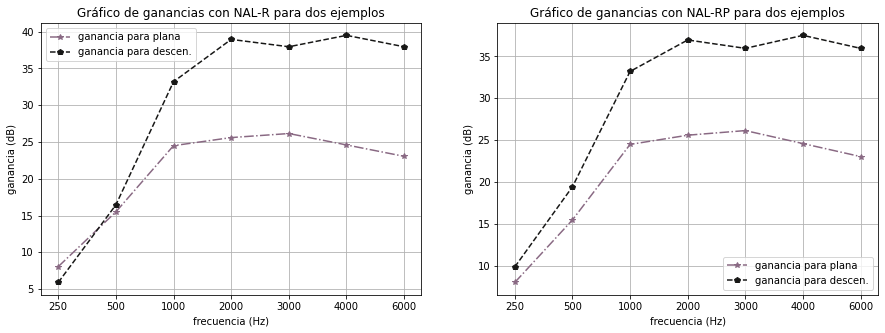

In [14]:
HTL_p = HTL_plana
HTL_d = HTL_descendente

gain_nalr_p = []
gain_nalr_d = []
gain_nalrp_p = []
gain_nalrp_d = []

f = []
#Calculos de NAL-R
for i in HTL_p:
    gain_r = NAL_R(i, HTL_p)
    gain_nalr_p.append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r = NAL_R(i, HTL_d)
    gain_nalr_d.append(gain_r)

#Calculos de NAL-RP
for i in HTL_p:
    gain_r = NAL_RP(i, HTL_p)
    gain_nalrp_p.append(gain_r)
for i in HTL_d:
    gain_r = NAL_RP(i, HTL_d)
    gain_nalrp_d.append(gain_r)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(f,gain_nalr_p, linestyle='dashdot', marker='*', color=cl_1, label='ganancia para plana')
ax[0].plot(f,gain_nalr_d, linestyle='--', marker='p', color=cl_2, label='ganancia para descen.')
ax[1].plot(f,gain_nalrp_p, linestyle='dashdot', marker='*', color=cl_1, label='ganancia para plana')
ax[1].plot(f,gain_nalrp_d, linestyle='--', marker='p', color=cl_2, label='ganancia para descen.')
ax[0].legend();
ax[1].legend();

ax[0].set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title='Gráfico de ganancias con NAL-R para dos ejemplos')
ax[0].grid()
ax[1].set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title='Gráfico de ganancias con NAL-RP para dos ejemplos')
ax[1].grid()

fig.savefig("gain-nalrp1.jpg")
plt.show()

## POGO II <span id="pogoII"><span>
    
Funciona utilizando los umbrales auditivos, los cuales se evaluarán si son mayores o menores 65 dB. Además, este método calcula la máxima salida de saturación (SS) para ellos utiliza el UCL de las frecuencias 500, 1000 y 2000Hz. DSL v4.0:utiliza los umbrales de pérdida auditiva para buscar mediante una base de datos la ganancia en función de la frecuencia e intensidad.
    
![POGO](https://raw.githubusercontent.com/Debaq/jupyter_algorithms_hear_aid/main/Fig/POGOII_dia.png)

In [15]:
def POGO_II(f, th_list, UCL):
    '''
    return = REIG ganancia requerida por la frecuencia de entrada
    
    '''
    f = str(f)
    HTL = th_list[f]
    CZ ={
        "250"  : -10,
        "500"  : -5,
        "1000" : 0,
        "2000" : 0,
        "3000" : 0,
        "4000" : 0,
        "6000" : 0,
        }
    
    PeakSSPL90 = (((UCL["500"]) + (UCL["1000"]) + UCL["2000"])/3)+4
    
    med_HTL = HTL * 0.5
    
    if HTL > 65:
        IG = med_HTL + CZ[f] + (0.5*(HTL-65))
    else:
        IG = med_HTL + CZ[f]
    
    return (IG, PeakSSPL90)
        
        

## POGO II Ganancia para las perdidas de ejemplo  <span id="pogo_II_example"><span>
    
    ejemplo gráfico de ganancia con pérdida auditiva plana y descendente  

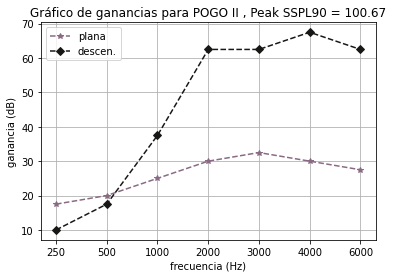

In [16]:
HTL_p = HTL_plana
HTL_d = HTL_descendente

gain_p = []
gain_d = []
f = []

for i in HTL_p:
    gain_r, p = POGO_II(i, HTL_p, UCL)
    gain_p.append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r, p = POGO_II(i, HTL_d, UCL)
    gain_d.append(gain_r)


fig, ax = plt.subplots()
ax.plot(f,gain_p, linestyle='--', marker='*', color=cl_1, label='plana')
ax.plot(f,gain_d, linestyle='--', marker='D', color=cl_2, label='descen.')


leg = ax.legend();

title = 'Gráfico de ganancias para POGO II , Peak SSPL90 = {}'.format(round(p,2))

ax.set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title=title)
ax.grid()

fig.savefig("gain-POGO II.jpg")


## DSL v4.0 <span id="DSL"><span>
    
Utiliza los umbrales de pérdida auditiva para buscar mediante una base de datos la ganancia en función de la frecuencia e intensidad.
![DSL](https://raw.githubusercontent.com/Debaq/jupyter_algorithms_hear_aid/main/Fig/DSL_dia.png)


In [17]:

def DSL_40(HTL, f):
    """
    HTL: umbral auditivivo
    f: frecuencia del umbral
    IG
    
    """
    frs = [250,500,750,1000,1500,2000,3000,4000,6000]
    mtrx_DSL = {
        "0": [0,2,3,3,5,12,16,14,8],
        "5": [3,4,5,5,8,15,18,17,11],
        "10": [5,6,7,8,10,17,20,19,14],
        "15":[7,8,10,10,13,19,23,21,17],
        "20":[9,11,12,13,15,22,25,24,20],
        "25":[12,13,14,15,18,24,28,27,23],
        "30":[14,15,17,18,20,27,30,29,26],
        "35":[17,18,19,21,23,30,33,32,29],
        "40":[20,20,22,24,26,33,36,35,32],
        "45":[22,23,25,27,29,36,39,38,36],
        "50":[25,26,28,30,32,39,42,41,39],
        "55":[29,29,31,33,35,42,45,45,43],
        "60":[32,32,34,36,38,46,48,48,46],
        "65":[36,35,37,40,42,49,52,51,50],
        "70":[39,38,40,43,45,52,55,55,54],
        "75":[43,42,43,46,48,56,59,58,58],
        "80":[47,45,47,50,52,59,62,62,61],
        "85":[51,48,50,53,55,63,66,65,65],
        "90":[55,52,54,57,59,66,69,69,69],
        "95":[59,55,57,60,62,70,73,73,69],
        "100":[62,59,61,64,66,73,76,76,69],
        "105":[62,62,64,68,70,77,80,80,69],
        "110":[62,66,68,71,73,80,83,84,69]
    }
    HTL = str(HTL)
    if type(f) == type(1):
        int_f = f
    else:
        int_f = int(f)
    idx = frs.index(int_f)
    REAG = mtrx_DSL[HTL][idx]
        
    
    return REAG

## DSL v4.0 ejemplo <span id="DSL4_ejemplo"><span>
    
    ejemplo gráfico de ganancia de pérdidas auditivas plana y descendente 

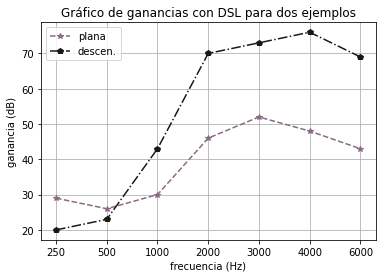

In [18]:
HTL_p = HTL_plana
HTL_d = HTL_descendente


gain_p = []
gain_d = []
f = []

for i in HTL_p:
    gain_r = DSL_40(HTL_p[i], i)
    gain_p.append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r = DSL_40(HTL_d[i], i)
    gain_d.append(gain_r)

fig, ax = plt.subplots()
plana = ax.plot(f,gain_p, linestyle='--', marker='*', color=cl_1, label='plana')
descen = ax.plot(f,gain_d, linestyle='dashdot',marker='p', color=cl_2, label='descen.')


leg = ax.legend();


title = 'Gráfico de ganancias con DSL para dos ejemplos'



ax.set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title=title)
ax.grid()

fig.savefig("gain-DSL.jpg")
plt.show()

## Comparación entre NAL-RP, POGO II, DSL <span id="NAL_POGO_DSL"><span>
    
    
    con pérdidas auditivas plana y descendente, se importan las funciones para así graficar y ejemplificar 

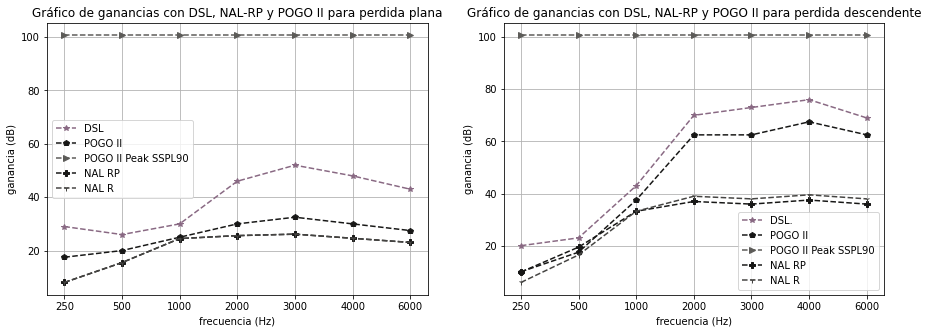

In [19]:
HTL_p = HTL_plana
HTL_d = HTL_descendente


DSL_p = []
DSL_d = []
POGOII_p = []
POGOII_p_SPL = []
POGOII_d = []
POGOII_d_SPL = []
NALRP_p = []
NALRP_d = []
NALR_p = []
NALR_d = []
f = []

for i in HTL_p:
    gain_r = DSL_40(HTL_p[i], i)
    DSL_p.append(gain_r)
    
    gain_r = POGO_II(i, HTL_p, UCL)
    POGOII_p.append(gain_r[0])
    POGOII_p_SPL.append(gain_r[1])
    
    gain_r = NAL_RP(i, HTL_p)
    NALR_p.append(gain_r)
    gain_r = NAL_R(i, HTL_p)
    NALRP_p.append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r = DSL_40(HTL_d[i], i)
    DSL_d.append(gain_r)

    gain_r = POGO_II(i, HTL_d, UCL)
    POGOII_d.append(gain_r[0])
    POGOII_d_SPL.append(gain_r[1])
    
    gain_r = NAL_R(i, HTL_d)
    NALR_d.append(gain_r)
    
    gain_r = NAL_RP(i, HTL_d)
    NALRP_d.append(gain_r)
    
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].plot(f,DSL_p, linestyle='--', marker='*', color=cl_1, label='DSL')
ax[0].plot(f,POGOII_p, linestyle='--', marker='p', color=cl_2, label='POGO II')
ax[0].plot(f,POGOII_p_SPL, linestyle='--', marker='>', color=cl_3, label='POGO II Peak SSPL90')
ax[0].plot(f,NALRP_p, linestyle='--', marker='P', color=cl_4, label='NAL RP')
ax[0].plot(f,NALR_p, linestyle='--', marker='1', color=cl_5, label='NAL R')

ax[1].plot(f,DSL_d, linestyle='--',marker='*', color=cl_1, label='DSL.')
ax[1].plot(f,POGOII_d, linestyle='--', marker='p', color=cl_2, label='POGO II')
ax[1].plot(f,POGOII_d_SPL, linestyle='--', marker='>', color=cl_3, label='POGO II Peak SSPL90')
ax[1].plot(f,NALRP_d, linestyle='--', marker='P', color=cl_4, label='NAL RP')
ax[1].plot(f,NALR_d, linestyle='--', marker='1', color=cl_5, label='NAL R')

ax[0].legend();
ax[1].legend();


title = 'Gráfico de ganancias con DSL, NAL-RP y POGO II para perdida plana'
title1 = 'Gráfico de ganancias con DSL, NAL-RP y POGO II para perdida descendente'



ax[0].set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title=title)
ax[0].grid()

ax[1].set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title=title1)
ax[1].grid()




fig.savefig("gain-DSL_NALRP_POGOII.jpg")
plt.show()

Para evaluar los algoritmos en el banco de pruebas se utilizaron las dos pérdidas simuladas, en donde para la pérdida plana (gráfico izquierdo) se puede observar que en las frecuencias graves se aplica una menor ganancia, en la frecuencia de 1000 Hz se observa una muesca presente en los métodos prescriptivos NAL-R, NAL-RP, POGO II y DSL, para las frecuencias superiores a 1000 Hz la ganancia va a ir en aumento. En la pérdida descendente (gráfico derecho) se observa la diferencia entre NAL R y RP más ganancia en frecuencia para graves pero mayor ganancia para frecuencias agudas se observa que los métodos NAL-R, NAL-RP, POGO II y DSL la ganancia va a aumentar exponencialmente de frecuencias graves a agudas, en donde para los dos últimos métodos este aumento es mayor. Obsérvese que POGO II Peak SSPL90 para todas las frecuencias se comporta como límite de compresión.

<hr>

# Desde aquí en adelante se encuentra este Notebook en desarrollo, le invitamos a aportar, creando sus propios commit o forks de nuestro GitHub
# https://github.com/Debaq/jupyter_algorithms_hear_aid

<hr>

# Analisis de flujo de audio

## Presentación de Sonidos de Prueba

A continuaciónse presentan los sonidos de pruebas utilizados que corresponden a grabaciones de voz hablada de las listas de palabras de Farfán 

> Julio Palacios. Evaluación de familiaridad y rendimiento de lista de palabras usadas en logo audiometría. 2000. Tesis para optar al titulo de tecnologo médico con manción en otorrinolaringología.




In [ ]:
dir_base = pathlib.Path().absolute()
dir_audio = "audio_tesis"
sonido_list= ["cables_mono","cuento_mono"]
sonido_dir = []

for i in sonido_list:
    name = "{}/{}/{}.wav".format(dir_base, dir_audio, i)
    sonido_dir.append(name)  

In [ ]:
### Esta función fue tomada y modificada de la doumenteación provista por librosa

def spectro(sampling_rate, audio_signal, name):
    '''
    sampling_rate : int, frecuencia de muestreo de la señal a procesar,
    audio_signal : np.array, array con la señal de audio
    name : str, nombre del audio para gráficar    
    '''
    #Preparación de los datos:
    window_length = int(0.0025 * sampling_rate)
    hop_length = int(0.0025* sampling_rate)
    lib_stft =librosa.stft(audio_signal, hop_length=hop_length, win_length=window_length)
    spectrogram = np.abs(lib_stft)
    
    #Se plotea el espectrograma:
    fig, ax = plt.subplots()
    
    ##Dibuja la imagen
    specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, hop_length=hop_length, cmap='gray_r',  y_axis='linear', x_axis='time')
    ##plt.ylim(20, 8000)
    
    ##Configuramos el tamaño
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    
    ##Ponemos el titulo
    new_name = "palabra : {}, rate: {}".format(name, sampling_rate)
    plt.title(new_name)
    
    ##Ponemos escala
    plt.colorbar(format='%+2.0f dB')
    
    ##Configura el grosor de las lineas por default
    plt.tight_layout()
    
    ##Guarda la imagen
    plt.savefig("tft_{}.png".format(name))


    

In [ ]:
## Esta función permite gráficar en 2d la fuente de sonido en la dimensión del tiempo

def draw_sound(file , name = False):
    '''
    file : str, ruta del fichero a graficar
    name : bolean
    '''
    audio_signal, sampling_rate = librosa.load(file)

    
    # Se resuelve el problema de los inputs sin nombre
    if name:
        name = "text"
        name2 = "text"
    else:
        number_inx = sonido_dir.index(file)
        name = "sonido : {}, rate: {}, channel: {}".format(sonido_list[number_inx].split("_")[0], sampling_rate, sonido_list[number_inx].split("_")[1])
        name2 = sonido_list[number_inx].split("_")[0]

    #Configuramos el tamaño
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.plot(audio_signal, color=cl_1)
    
    #Se le coloca el título
    plt.title(name)
    
    #Configura el grosor de las lineas por default
    plt.tight_layout()
    plt.figure()
    
    #Configura el grosor de las lineas por default
    plt.tight_layout()
    
    #Guarda la imagen
    plt.savefig("signal_{}.jpg".format(name2), dpi=150)

    output = [sampling_rate,audio_signal, name2]
    return output

# Gráficos de los sonidos de entrada:
## Amplitud v/s Tiempo :

In [ ]:
# Data for plotting

HTL_plana={"250":55,"500":50,"1000":50,"2000":60,"3000":65,"4000":60,
           "6000":55}

HTL_descendente ={"250":25,"500":30,"1000":45,"2000":80,"3000":85,"4000":90,
           "6000":90}

UCL = {"500":95, "1000":95, "2000":100}


curve_plane = HTL_plana.items()
x1, y1 = zip(*curve_plane)


curve_desc = HTL_descendente.items()
x2, y2 = zip(*curve_desc)

curve_UCL = UCL.items()
x3, y3 = zip(*curve_UCL)

fig, ax = plt.subplots()
ax.plot(x1,y1, linestyle='--', marker='o', color=cl_1, label='plana')
ax.plot(x2,y2, linestyle='--', marker='x', color=cl_2, label='descen')
ax.plot(x3,y3, linestyle='--', marker='^', color=cl_2, label='UCL')

leg = ax.legend();
plt.ylim([0, 120])
plt.gca().invert_yaxis()


ax.set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title='Perdidas utilizadas para generar los gráficos de ejemplo')
ax.grid()

fig.savefig("ejemplos de perdida.jpg")
plt.show()


In [ ]:
data_sound = []
for i in sonido_dir:
    rt = draw_sound(i)
    data_sound.append(rt)



In [ ]:
for i in data_sound:
    spectro(i[0], i[1], i[2])

In [ ]:
####FUNCIONES DE AYUDA####
#Energía a dB 
def power_to_db(S, ref=1.0, amin=1e-10, top_db=80.0):
    S = np.asarray(S)
    magnitude = S
    if callable(ref):
        ref_value = ref(magnitude)
    else:
        ref_value = np.abs(ref)
        log_spec = 10.0 * np.log10(np.maximum(amin, magnitude))
        log_spec -= 10.0 * np.log10(np.maximum(amin, ref_value))
    if top_db is not None:
        log_spec = np.maximum(log_spec, log_spec.max() - top_db)
    return log_spec

#dB a Energía   
def db_to_power(S_db, ref=1.0):
    return ref * np.power(10.0, 0.1 * S_db)

#Amplitud a dB
def amplitude_to_db(S, ref=1.0, amin=1e-5, top_db=80.0):
    S = np.asarray(S)
    Sign = np.sign(S)
    magnitude = np.abs(S)
    if callable(ref):
        ref_value = ref(magnitude)
    else:
        ref_value = np.abs(ref)
    power = np.square(magnitude, out=magnitude)
    return power_to_db(power, ref=ref_value ** 2, amin=amin ** 2, top_db=top_db), Sign

#dB a amplitud
def db_to_amplitude(S_db, sign, ref=1.0):
    result = (db_to_power(S_db, ref=ref ** 2) ** 0.5)*sign
    return result



In [ ]:
#Bandas entre octavas
list_band = [
             [20, 384], #banda cf: <- 256
             [385,768], #banda cf:512
             [769, 1280], #banda cf:1024
             [1281, 2524], #banda cf:2048
             [2525, 3548], #banda cf:3000
             [3549, 5048], #banda cf:4096
             [5049, 7091], #banda cf:6000
             [7092, 20000], #banda cf:8192 ->
             ] 


#filtro de banda 
def bandpass_filter(data, ampli, cuters, fs, order=5, gain=0):
    lowcut, highcut = cuters
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    filtered = ((lfilter(b, a, data))*10**(gain/20))
    return filtered

#Separador de bandas frecuenciales. 
def equalizer_band(fs, data, gain=0, band=list_band):

    mem = [[],[],[],[],[],[],[],[]]
    for idx, val in enumerate(list_band):
        extract = bandpass_filter(data,wdrc,val,fs,order=3)
        mem[idx] = extract

    result = mem[0] + mem[1] + mem[2]+ mem[3]+ mem[4]+ mem[5]+ mem[6]+ mem[7]
    return result




In [ ]:
HTL_p = HTL_plana
HTL_d = HTL_descendente
test_data = data_sound[0][1]

test_1 = amplitude_to_db(test_data,top_db = 120)






In [ ]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, size=4000) # 1000 samples with normal distribution
plt.plot(s)
spectro(44100, s, "")

In [ ]:
name_file = "salida.wav"
write(name_file, 44100, new_sound)
ampli = draw_sound("{}".format(name_file), name=True)
print(len(ampli[1]))
spectro(44100, ampli[1], ampli[2])


In [ ]:
nn = np.array([1,2,3,4,5])
x = 10
for 

# Bibliografía <span id="Bibliografía"><span>
    
1-. Mohith Reddy N, Suchetha M. Design of area efficient filter bank for digital hearing aids. J Phys Conf Ser. 2020; 1716:012049.

2-. Dillon H. Hearing Aids. 2nd ed. New York, NY: Thieme Medical; 2012.

3-. Kates JM. Principles of digital dynamic-range compression. Trends Amplif. 2005;9(2):45–76; 10.1177/108471380500900202.

4-. Cornelisse LE, Seewald RC, Jamieson DG. The input/output formula: a theoretical approach to the fitting of personal amplification devices. J Acoust Soc Am. 1995;97(3):1854–64; 10.1121 / 1.412980.

5-. Zenker F. La prescripción de la ganancia en la adaptación audioprotésica. Auditio. 2002;1(3):45–52; https://doi.org/10.51445/sja.auditio.vol1.2002.0018.

6-. Banerjee S. The compression handbook. Starkey Laboratories; 2011

7-. Keidser G, Dillon H, Flax M, Ching T, Brewer S. The NAL-NL2 prescription procedure. Audiol Res. 2011;1(1): e24; https://doi.org/10.4081/audiores.2011.e24.

8-. Seewald R, Moodie S, Scollie S, Bagatto M. The DSL method for pediatric hearing instrument fitting: historical perspective and current issues. Trends Amplif. 2005;9(4):145–57; 10.1177/108471380500900402.

9-. Patel K, Panahi IMS. Compression fitting of hearing aids and implementation. Annu Int Conf IEEE Eng Med Biol Soc. 2020; 2020:968–71; 10.1109 / EMBC44109.2020.9176368.

10-. Garudadri H, Boothroyd A, Lee C-H, Gadiyaram S, Bell J, Sengupta D, et al. A realtime, open-source speech-processing platform for research in hearing loss compensation. In: 2017 51st Asilomar Conference on Signals, Systems, and Computers. IEEE; 2017.

11-. Perkel JM. Why Jupyter is data scientists’ computational notebook of choice. Nature. 2018;563(7729):145–6; 10.1038 / d41586-018-07196-1. 12-. Project Jupyter [Internet]. Jupyter.org. [cited 2021 Jul 20]. Available from: https://jupyter.org/

13-. Ibrahim I, Parsa V, Macpherson E, Cheesman M. Evaluation of speech intelligibility and sound localization abilities with hearing aids using binaural wireless technology. Audiol Res. 2013;3(1):e1; 10.4081 / audiores.2013.e1.

14-. Reinhart PN, Souza PE. Intelligibility and clarity of reverberant speech: Effects of wide dynamic range compression release time and working memory. J Speech Lang Hear Res. 2016;59(6):1543–54; 10.1044 / 2016_JSLHR-H-15-0371.

15-. Smeds K. Is normal or less than normal overall loudness preferred by first-time hearing aid users? Ear Hear. 2004;25(2):159–72; 10.1097 / 01.aud.0000120364.13671.e2.

16-. Plyler PN, Trine TD, Blair Hill A. The subjective evaluation of the expansion time constant in single-channel wide dynamic range compression hearing instruments: La evaluación subjetiva de la constante de expansión temporal en instrumentos auditivos de un canal con compresión de rango dinámico amplio. Int J Audiol. 2006;45(6):331–6; 10.1080 / 14992020600582224.

17-. Ching TYC, Johnson EE, Hou S, Dillon H, Zhang V, Burns L, et al. A comparison of NAL and DSL prescriptive methods for paediatric hearing-aid fitting: predicted speech intelligibility and loudness. Int J Audiol. 2013;52 Suppl 2(sup2):S29-38.; 10.1080 / 14992020600582224.

18-. Davies A, Hooley F, Causey-Freeman P, Eleftheriou I, Moulton G. Using interactive digital notebooks for bioscience and informatics education. PLoS Comput Biol. 2020;16(11):e1008326; https://doi.org/10.1371/journal.pcbi.1008326.

19-. Rosenthal SB, Len J, Webster M, Gary A, Birmingham A, Fisch KM. Interactive network visualization in Jupyter notebooks: visJS2jupyter. Bioinformatics. 2018;34(1):126–8; 10.1093 / bioinformática / btx581.

20-. National Acoustic Laboratories - [Internet]. Gov.au. [citado el 7 de agosto de 2021]. Disponible en: https://www.nal.gov.au/